In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from copy import deepcopy
%matplotlib inline
import itertools as it

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
reg=linear_model.LinearRegression()
x_ground_temp = df[["Ground Temperature"]] #independent variable
y_chirps_second = df[["Chirps/Second"]] #dependent variable
reg.fit(x_ground_temp,y_chirps_second) # fit(x,y)

LinearRegression()

In [ ]:
# 1) Linear Regression Equation for this data is
#print("Linear Regression Equation for this data is y = {:.4f}*x + {:.4f}".format(reg.coef_[0], reg.intercept_))
print(reg.coef_[0])
print(reg.intercept_)
print("The Linear Regression Equation is y = 0.20299973*x + 0.45931465")

[0.20299973]
[0.45931465]
The Linear Regression Equation is y = 0.20299973*x + 0.45931465


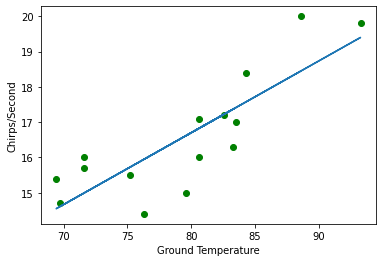

In [ ]:
# 2) Chart the original data and the equation on the char
plt.scatter(x_ground_temp, y_chirps_second, color = "green")
plt.plot(x_ground_temp, reg.predict(x_ground_temp))
plt.xlabel("Ground Temperature")
plt.ylabel("Chirps/Second")
plt.show()

In [ ]:
# 3) Find the R^2 value

print(reg.score(x_ground_temp, y_chirps_second))
if reg.score(x_ground_temp, y_chirps_second) < 0.8:
  print("Not a good fit")
else:
  print("Good fit")


0.6922946529146998
Not a good fit


In [ ]:
# 4) Extrapolate Data
#reg.predict(95)[0]
extrap = reg.predict(np.array([95]).reshape(1, 1))
print(extrap)

[[19.74428913]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# 5) Find the x value when y is given
#y = m * x + c
#x = (y - c) / m

#Function to find x when y is given
def Chirps_When_Temp(y):
  print((y-reg.intercept_)/(reg.coef_[0]))

Chirps_When_Temp(18)

[86.40743135]


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df2 = pd.read_fwf("brain_body.txt")

In [ ]:
reg2 = linear_model.LinearRegression()
x_body = df2[["Body"]] #independent variable
y_brain = df2[["Brain"]] #dependent variable
reg2.fit(x_body,y_brain)

LinearRegression()

In [ ]:
#1 Linear Regression equation
print(reg2.coef_[0])
print(reg2.intercept_)
print("The Linear Regression Equation is y = 0.9029*x - 56.8555")

[0.90291295]
[-56.85554543]
The Linear Regression Equation is y = 0.9029*x - 56.8555


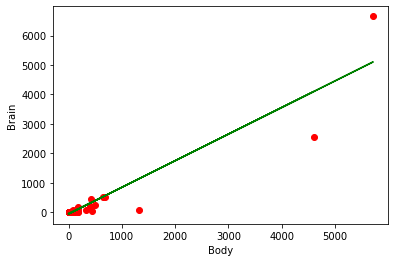

In [ ]:
#2 Chart the original data and equation on the chart
plt.scatter(x_body,y_brain, c = "red")
plt.plot(x_body, reg2.predict(x_body), c = "green")
plt.xlabel("Body")
plt.ylabel("Brain")
plt.show()

In [ ]:
# 3) Find the R^2 value

print(reg2.score(x_body, y_brain))
def goodfit(r):
  if r >= 0.8:
    print("Good Fit")
  else:
    print("Not a Good Fit")

goodfit(reg2.score(x_body, y_brain))


0.8726620843043331
Good Fit


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [4]:
df3 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df3.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [6]:
df3.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [7]:
x_independent_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']


In [8]:
def linear_regression_equation(x_independent_cols, df3):  
  x_cols = df3[x_independent_cols]
  salary = df3["Salary"]
  reg3 = linear_model.LinearRegression()
  reg3.fit(x_cols, salary)
  print('The equation for columns {} with respect to Salary:\n''{} + {}'.format(x_independent_cols, reg3.coef_, reg3.intercept_))

In [9]:

#print(reg3.coef_)
#print(reg3.intercept_)

In [10]:
print("The Linear regression equation is y = 1241.7924*x1 + 5586.1814*x2 + 482.8597*x3 - -1331.644*x4 - 128.7905*x5 - 11410.1465")

The Linear regression equation is y = 1241.7924*x1 + 5586.1814*x2 + 482.8597*x3 - -1331.644*x4 - 128.7905*x5 - 11410.1465


In [11]:
#1 
linear_regression_equation(x_independent_cols, df3)

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


In [12]:
#2 
def linear_regression_focus(x_independent_cols, df3, focus = "Salary"):
  x_cols = df3[x_independent_cols]
  focus_output = df3[focus]
  reg3 = linear_model.LinearRegression()
  reg3.fit(x_cols, focus_output)
  return reg3.score(x_cols, focus_output)

In [13]:
print('R^2 score for equation using all columns: {}'
      .format(linear_regression_focus(x_independent_cols, df3)))

R^2 score for equation using all columns: 0.8547180674410969


In [14]:
def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

In [17]:
combos = get_combos(x_independent_cols)

In [15]:
def all_combo_scores(combos, df3, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[linear_regression_focus(list(n), df3, focus)] = n
    return combo_scores

In [18]:
combo_scores = all_combo_scores(combos, df3)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

Salary Discrimination, Task 2 Conclusion
The selection with the best  score is: Sex, Rank, Year, Degree, YSdeg: 0.85471806744109691 (as seen above)

However, although including all of the columns produces the highest  score, there are two dominant factors: Year and Rank. Just these two factors taken together have a score of 0.84364809332645985.

In [19]:
#3 

num_by_sex = df3.Sex.value_counts()
print('Men: {}\nWomen: {}'.format(num_by_sex[0], num_by_sex[1]))

Men: 38
Women: 14


In [20]:
df3.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


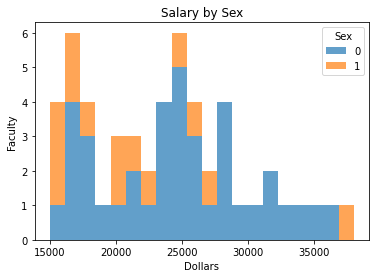

In [21]:
#Salary by Sex
df3.pivot_table(index=df3.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20, title='Salary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

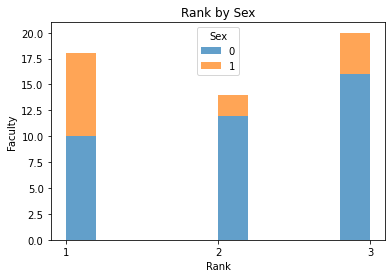

In [22]:
#Salary by Rank
df3.pivot_table(index=df3.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, title='Rank by Sex')
plt.xticks([1, 2, 3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()

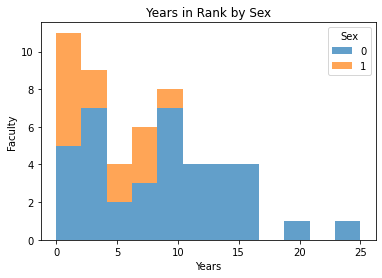

In [23]:
df3.pivot_table(index=df3.index, columns='Sex', values='Year') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=12,
          title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()

In [24]:
#Comparing men and women with less than 10 years
df3_10 = df3[df3['Year'] <= 10]

In [25]:
combos_10 = get_combos(x_independent_cols)
combo_10_scores = all_combo_scores(combos_10, df3_10)
sorted(combo_10_scores.items(), key=lambda c: c[0], reverse=True)

[(0.7968248819660304, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7872092866034841, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.7857914167129874, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7812953737007232, ('Rank', 'Year', 'YSdeg')),
 (0.7811304025138202, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.7809344717080977, ('Sex', 'Rank', 'Year')),
 (0.7783076155381674, ('Rank', 'Year', 'Degree')),
 (0.778125545829645, ('Rank', 'Year')),
 (0.7267866959953191, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7266289950954575, ('Sex', 'Rank', 'Degree')),
 (0.7263171650507368, ('Rank', 'Degree', 'YSdeg')),
 (0.7262952984826756, ('Rank', 'Degree')),
 (0.7237917566538923, ('Sex', 'Rank', 'YSdeg')),
 (0.7237599305119999, ('Rank', 'YSdeg')),
 (0.7224004990910746, ('Sex', 'Rank')),
 (0.7221603677648399, ('Rank',)),
 (0.5211388967522836, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.5106317178170396, ('Year', 'Degree', 'YSdeg')),
 (0.47582422204482044, ('Sex', 'Degree', 'YSdeg')),
 (0.46515893607776626, ('Sex', 'Year'

Sex has no direct influence on Salary: score of 0.0068777005613497311

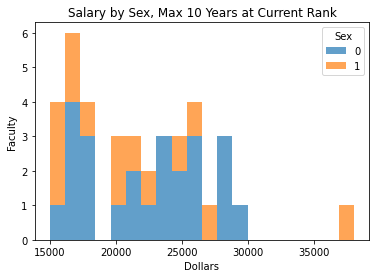

In [26]:
df3_10.pivot_table(index=df3_10.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20,
          title='Salary by Sex, Max 10 Years at Current Rank')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

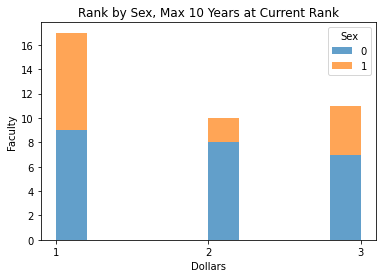

In [27]:
df3_10.pivot_table(index=df3_10.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, 
          title='Rank by Sex, Max 10 Years at Current Rank')
plt.xticks([1,2,3])
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

In [28]:
rank_discrim_cols = ['Sex', 'Year', 'Degree', 'YSdeg']
combos_rank = get_combos(rank_discrim_cols)
combo_rank_scores = all_combo_scores(combos_rank, df3_10, 'Rank')
sorted(combo_rank_scores.items(), key=lambda c: c[0], reverse=True)

[(0.6684776318082726, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6650836168279376, ('Sex', 'Degree', 'YSdeg')),
 (0.6123237979933462, ('Year', 'Degree', 'YSdeg')),
 (0.6121040013037697, ('Degree', 'YSdeg')),
 (0.5169568608935469, ('Sex', 'Year', 'YSdeg')),
 (0.5169178279759162, ('Sex', 'YSdeg')),
 (0.4848731472423391, ('Year', 'YSdeg')),
 (0.48257642674080226, ('YSdeg',)),
 (0.17754355818252243, ('Sex', 'Year', 'Degree')),
 (0.17641648396278564, ('Sex', 'Year')),
 (0.1761306214861189, ('Year', 'Degree')),
 (0.17502353196257248, ('Year',)),
 (0.016344674690073613, ('Sex', 'Degree')),
 (0.013387066889012145, ('Sex',)),
 (0.0036042103162727823, ('Degree',))]

Even looking at the influencers of Rank, looking only at those who have been at their present rank for 10 years or less, there is no correlation with Sex. There is no salary discrimination by Sex.